# Project

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In this notebook two different data tables are clustered with different clustering methods and clusters are the evaulated with the Normalized Mutual Information Score. The clusterings are mostly done with the help of the python library sklearn which has been used alot in the course. The order of this document will be:

Data in 'msdata.csv' is clustered with:

    1. K-means clustering
    2. Spectral clustering
    
Then the data in 'genedata.csv' is clustered with:

    1. K-means clustering

In [3]:
msdf = pd.read_csv('msdata.csv')
msdfdata = msdf[msdf.columns[2:]]

1. K-means clustering

In [4]:
mixture = GaussianMixture(n_components=3).fit(msdfdata)
label = mixture.fit_predict(X=msdfdata)
mixtureNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Gaussian Mixture with {} clusters Normalized Mutual Information Score: {}".format(3, mixtureNorm))

Gaussian Mixture with 3 clusters Normalized Mutual Information Score: 0.3364258568034021


In [9]:
for i in range(10):
    kmeans = KMeans(n_clusters=3, algorithm="elkan").fit(msdfdata)
    label = kmeans.labels_
    kmeanNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
    print("KMeans with {} clusters Normalized Mutual Information Score: {}".format(3, kmeanNorm))


KMeans with 3 clusters Normalized Mutual Information Score: 0.0031115195147308726
KMeans with 3 clusters Normalized Mutual Information Score: 0.09697750042525421
KMeans with 3 clusters Normalized Mutual Information Score: 0.10247896747429054
KMeans with 3 clusters Normalized Mutual Information Score: 0.0031115195147308726
KMeans with 3 clusters Normalized Mutual Information Score: 0.11900240394932182
KMeans with 3 clusters Normalized Mutual Information Score: 0.0031115195147308726
KMeans with 3 clusters Normalized Mutual Information Score: 0.0037554952501355943
KMeans with 3 clusters Normalized Mutual Information Score: 0.0031115195147308726
KMeans with 3 clusters Normalized Mutual Information Score: 0.0037554952501355943
KMeans with 3 clusters Normalized Mutual Information Score: 0.04679014608509312


2. Spectral clustering

In [53]:
clustering = SpectralClustering(n_clusters=3).fit(msdfdata)
label = clustering.labels_
specNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Spectral Clustering with {} clusters Normalized Mutual Information Score: {}".format(3, specNorm))

/home/calle/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Spectral Clustering with 3 clusters Normalized Mutual Information Score: 0.00198937067956181


In [49]:
brch = Birch(n_clusters=3).fit(msdfdata)
label = brch.labels_
brchNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Birch with {} clusters Normalized Mutual Information Score: {}".format(3, brchNorm))

Birch with 3 clusters Normalized Mutual Information Score: 0.27482636965510837


In [8]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(msdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(3, aggloNorm))

Agglomerative with 3 clusters Normalized Mutual Information Score: 0.2780728028320788


In [6]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(msdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(3, aggloNorm))

Agglomerative with 3 clusters Normalized Mutual Information Score: 0.2489311460859403


In [5]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="average").fit(msdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(3, aggloNorm))

Agglomerative with 3 clusters Normalized Mutual Information Score: 0.018971829084704715


In [7]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="single").fit(msdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(msdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(3, aggloNorm))

Agglomerative with 3 clusters Normalized Mutual Information Score: 0.018971829084704715


Starting to cluster the other data file

In [162]:
gdf = pd.read_csv('genedata.csv')
gdfdata = gdf[gdf.columns[2:]]

In [163]:
for i in range(10):
    kmeans = KMeans(n_clusters=5, algorithm="full").fit(gdfdata)
    label = kmeans.labels_
    kmeanNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
    print("KMeans with {} clusters Normalized Mutual Information Score: {}".format(6, kmeanNorm))


KMeans with 6 clusters Normalized Mutual Information Score: 0.8562774639480124
KMeans with 6 clusters Normalized Mutual Information Score: 0.8562774639480125
KMeans with 6 clusters Normalized Mutual Information Score: 0.8574036569173418
KMeans with 6 clusters Normalized Mutual Information Score: 0.8585439102213661
KMeans with 6 clusters Normalized Mutual Information Score: 0.8585439102213661
KMeans with 6 clusters Normalized Mutual Information Score: 0.8562774639480124
KMeans with 6 clusters Normalized Mutual Information Score: 0.8585439102213659
KMeans with 6 clusters Normalized Mutual Information Score: 0.8562774639480127
KMeans with 6 clusters Normalized Mutual Information Score: 0.8585439102213661
KMeans with 6 clusters Normalized Mutual Information Score: 0.8585439102213661


Spectral clustering

In [162]:
clustering = SpectralClustering(n_clusters=5).fit(gdfdata)
label = clustering.labels_
specNorm = normalized_mutual_info_score(gdf['class'], label)
print("Spectral Clustering with {} clusters Normalized Mutual Information Score: {}".format(6, specNorm))

/home/calle/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Spectral Clustering with 6 clusters Normalized Mutual Information Score: 0.017081943187279937


In [167]:
brch = Birch(n_clusters=5).fit(gdfdata)
label = brch.labels_
brchNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
print("Birch with {} clusters Normalized Mutual Information Score: {}".format(6, brchNorm))

Birch with 6 clusters Normalized Mutual Information Score: 0.8837573601627926


In [166]:
agglo = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(gdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(6, aggloNorm))

Agglomerative with 6 clusters Normalized Mutual Information Score: 0.8837573601627926


In [168]:
agglo = AgglomerativeClustering(n_clusters=5, linkage="complete").fit(gdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(6, aggloNorm))

Agglomerative with 6 clusters Normalized Mutual Information Score: 0.4359613137952448


In [169]:
agglo = AgglomerativeClustering(n_clusters=5, linkage="average").fit(gdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(6, aggloNorm))

Agglomerative with 6 clusters Normalized Mutual Information Score: 0.03618961451694587


In [170]:
agglo = AgglomerativeClustering(n_clusters=5, linkage="single").fit(gdfdata)
label = agglo.labels_
aggloNorm = normalized_mutual_info_score(gdf['class'], label, average_method="geometric")
print("Agglomerative with {} clusters Normalized Mutual Information Score: {}".format(6, aggloNorm))

Agglomerative with 6 clusters Normalized Mutual Information Score: 0.028462663673074918


# TESTING

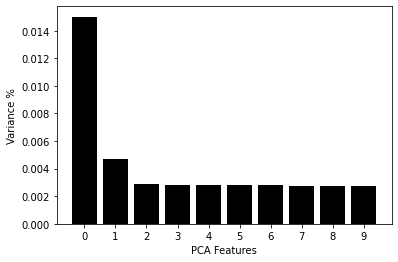

In [158]:
df = pd.read_csv("msdata.csv")
x_std = StandardScaler().fit_transform(df)

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="black")
plt.xlabel("PCA Features")
plt.ylabel("Variance %")
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [159]:
kmeans = KMeans(n_clusters=3).fit(PCA_components.iloc[:,:2])
label = kmeans.labels_
kmeanNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("KMeans with {} clusters Normalized Mutual Information Score: {}".format(3, kmeanNorm))


KMeans with 3 clusters Normalized Mutual Information Score: 0.7057431100067889


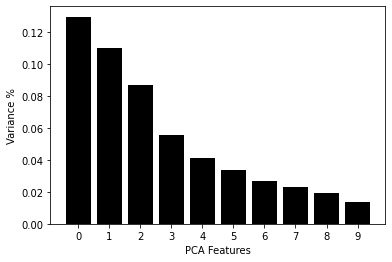

In [160]:
df = pd.read_csv("genedata.csv")
x_std = StandardScaler().fit_transform(df)

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="black")
plt.xlabel("PCA Features")
plt.ylabel("Variance %")
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [161]:
kmeans = KMeans(n_clusters=5).fit(PCA_components.iloc[:,:3])
label = kmeans.labels_
kmeanNorm = normalized_mutual_info_score(df['class'], label, average_method="geometric")
print("KMeans with {} clusters Normalized Mutual Information Score: {}".format(3, kmeanNorm))


KMeans with 3 clusters Normalized Mutual Information Score: 0.5384953385624399
